In [0]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Basic Insights and data cleaning

In [0]:
df = pd.read_excel('/content/drive/My Drive/New folder/hr-data.xlsx')

In [4]:
df.head()

,Unnamed: 0,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,0,113558,43.0,Male,Married,111.0,D00-PR,NaN,0.753977,5.0,1.0,medium,0.921208,Employed,4.0
1,1,112256,24.0,Female,Unmarried,201.0,D00-MN,NaN,0.964453,3.0,NaN,medium,0.568479,Employed,3.0
2,2,112586,22.0,Female,Unmarried,239.0,D00-SS,NaN,0.756458,3.0,NaN,low,0.144812,Employed,6.0
3,3,108071,36.0,Male,Married,151.0,D00-PR,NaN,0.608282,5.0,NaN,medium,0.210300,Employed,6.0
4,4,116915,38.0,Male,Married,259.0,-IT,NaN,0.749206,4.0,NaN,medium,0.888514,Employed,3.0


In [0]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14279 entries, 0 to 14278
Data columns (total 14 columns):
employee_id          14279 non-null int64
age                  14274 non-null float64
gender               14274 non-null object
marital_status       14274 non-null object
avg_monthly_hrs      14150 non-null float64
department           13443 non-null object
filed_complaint      2046 non-null float64
last_evaluation      12663 non-null float64
n_projects           14150 non-null float64
recently_promoted    297 non-null float64
salary               14150 non-null object
satisfaction         14000 non-null float64
status               14150 non-null object
tenure               14000 non-null float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.5+ MB


In [7]:
def columns():
  num_fea = df.dtypes[df.dtypes!='object'].index
  print('Numerical features:', len(num_fea))
  cat_fea = df.dtypes[df.dtypes=='object'].index
  print('Categorical features:', len(cat_fea))
  
  return num_fea, cat_fea
  
numerical_fetures, categorical_feautres = columns()

Numerical features: 9
Categorical features: 5


In [8]:
def missing():
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)
    return  missing_data
  
missing_data = missing()

                   Total   Percent
recently_promoted  13982  0.979200
filed_complaint    12233  0.856713
last_evaluation     1616  0.113173
department           836  0.058548
tenure               279  0.019539
satisfaction         279  0.019539
status               129  0.009034
salary               129  0.009034
n_projects           129  0.009034
avg_monthly_hrs      129  0.009034
marital_status         5  0.000350
gender                 5  0.000350
age                    5  0.000350
employee_id            0  0.000000


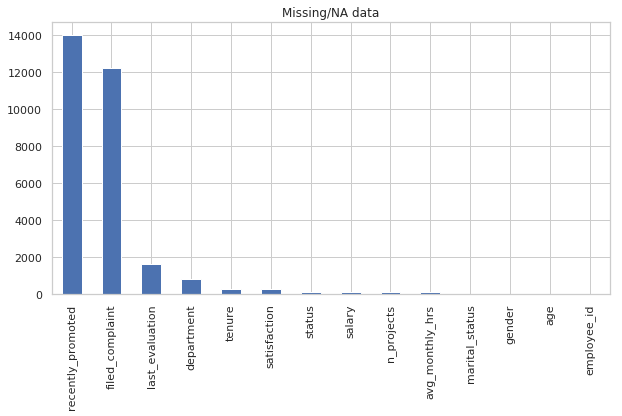

In [87]:
def miss_plot():
  plt.figure(figsize=(10,5))
  (missing_data['Total']).plot.bar()
  plt.title('Missing/NA data')
miss_plot()

In [0]:
df.drop(columns=['filed_complaint', 'recently_promoted'], axis=1, inplace=True)

In [0]:
df['department'] = df['department'].replace({'-IT':'D00-IT'})

In [0]:
df = df[pd.notnull(df['last_evaluation'])]
df = df[pd.notnull(df['department'])]

In [0]:
def fill_miss():  
  df['marital_status'] = df['marital_status'].fillna(df['marital_status'].mode()[0])
  df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
  df['age'] = df['age'].fillna(df['age'].median())

  return df

df = fill_miss()

In [14]:
def missing():
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)
missing()

                 Total  Percent
tenure               0      0.0
status               0      0.0
satisfaction         0      0.0
salary               0      0.0
n_projects           0      0.0
last_evaluation      0      0.0
department           0      0.0
avg_monthly_hrs      0      0.0
marital_status       0      0.0
gender               0      0.0
age                  0      0.0
employee_id          0      0.0


In [0]:
df.drop_duplicates(subset='employee_id', keep='first', inplace=True)

In [0]:
df = df.reset_index()

In [0]:
df.drop(columns='index', axis=1, inplace=True)

**End of data cleaning**
***



# EDA

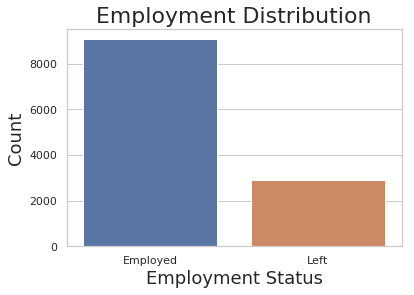

In [18]:
def plot1():
  g = sns.countplot(df['status'])
  g.set_title("Employment Distribution", fontsize=22)
  g.set_ylabel('Count', fontsize=18)
  g.set_xlabel('Employment Status', fontsize=18)
  plt.show()
  
plot1()

**We have a unbalanced target distribution**





---



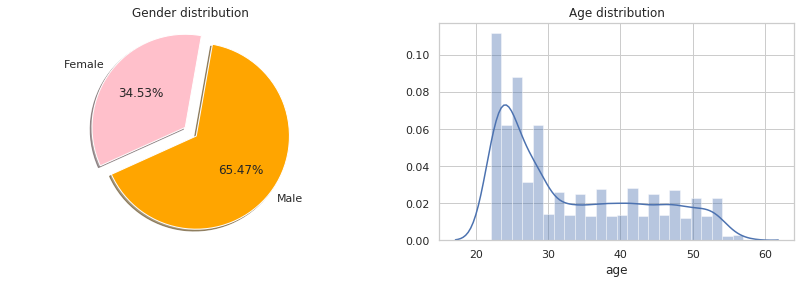

In [39]:
def plot2():
  
    plt.figure(figsize=(14,4))
    
  
    plt.subplot(1,3,1)   
    sex_count = [len(df[df['gender'] == 'Female']), len(df[df['gender'] == 'Male'])]
    labels = ['Female', 'Male']
    colors = ['pink', 'orange']
    explode = (0.05, 0.1)
    plt.pie(sex_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=80)
    plt.title('Gender distribution')
    plt.axis('equal')
    
    plt.subplot(1,2,2)
    sns.distplot(df['age'])
    plt.title('Age distribution')
       
    
    plt.show()  
       
plot2()



1. **Figure 1 shows male proportion to be higher than female**
2.  **Figure 2 shows the working age for the employess to be more around 23 - 30**






---



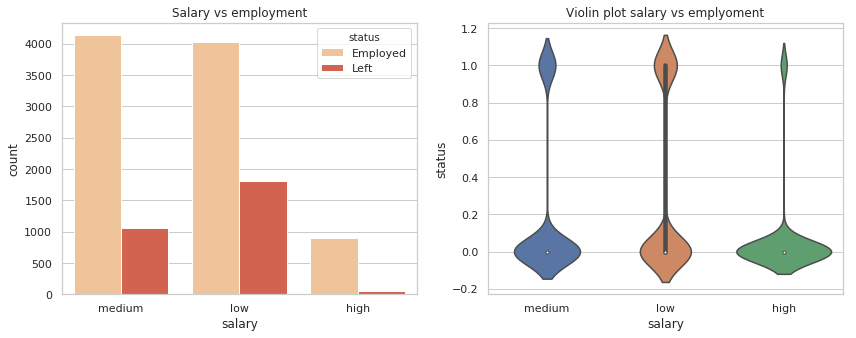

In [73]:
def plot3():
    
    """
    Lets compare The main reason for the employees to leave the company.
    We are going to compare Salary and Status here
    """
        
    temp = df.copy(deep=True)
    num = {"status": {"Left": 1, "Employed": 0}}
  
    temp.replace(num, inplace=True)
    
    plt.figure(figsize=(14,5))
    
    plt.subplot(1,2,1)
    p1 = sns.countplot(x='salary', data=df, hue='status', palette='OrRd')
    p1.set_title('Salary vs employment')
    
    plt.subplot(1,2,2)
    p2 = sns.violinplot('salary','status', kind='point', data = temp)
    p2.set_title('Violin plot salary vs emplyoment')
    

plot3()

**Obviously  reason for employees to leave the company is because they are paid low which is clear from the above plots**



---



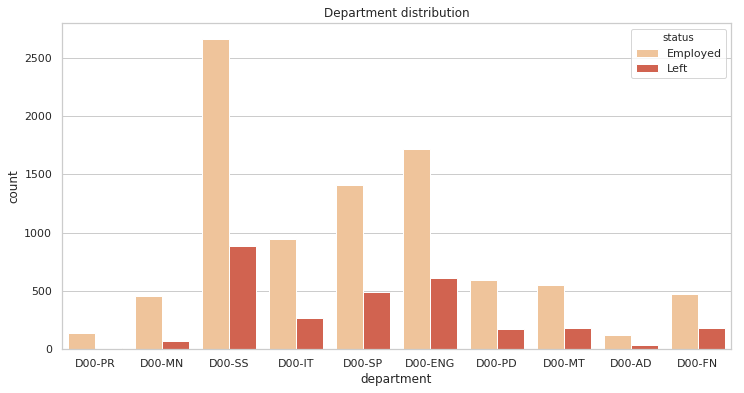

In [54]:
def plot4():
      
    #Lets focus on which department is making employees to leave 
       
    plt.figure(figsize=(12,6))
    p2 = sns.countplot(x='department', data=df, hue='status', palette='OrRd')
    p2.set_title('Department distribution')
    
    plt.show()
    
plot4()    

**Clear from the plot that the departmen D00-SS has the more number of people who have quit followed by D00-ENG and D00-SP**



---



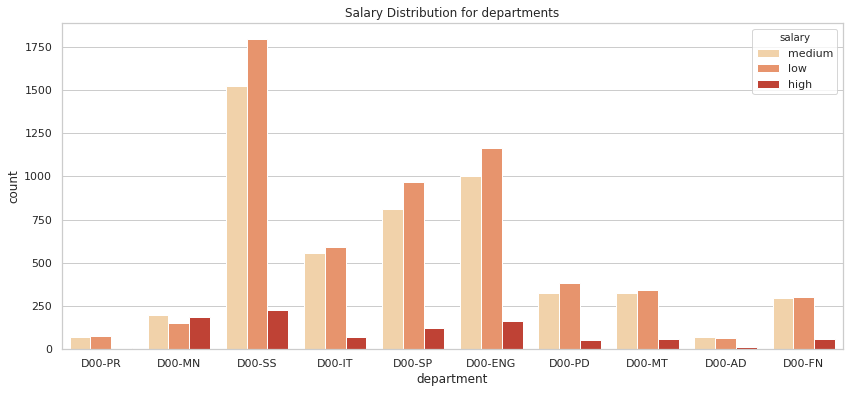

In [22]:
def plot5():
  
    # Focusing on Salary distribution to see why people who wotk on D00-SS quit 
  
    plt.figure(figsize=(14,6))
    p1 = sns.countplot(x='department', data=df, hue='salary', palette='OrRd')
    p1.set_title('Salary Distribution for departments')
    
    plt.show()

plot5()

**So Employees being paid low for the D00-SS department is the major reason for quiting the job.**

**The same applies for the departments D00-ENG and D00-SP having their employess paid low.**




---



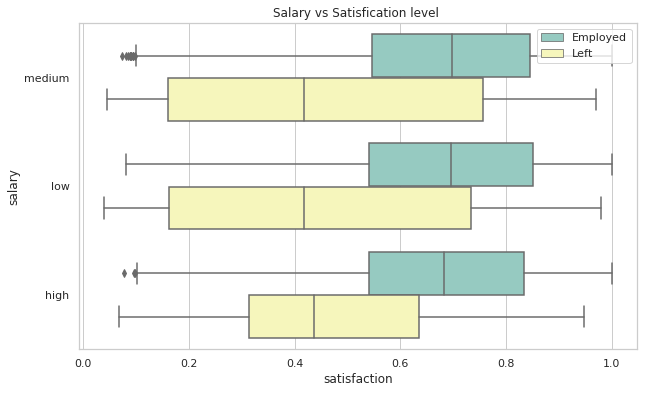

In [89]:
def plot6():
        
    # Plotting Salary against satisfcation 
    
    plt.figure(figsize=(10,6))
    
    sns.boxplot(x='satisfaction', y='salary', data=df, hue='status',palette='Set3')
    plt.legend(loc='upper right')
    plt.title('Salary vs Satisfication level ')
    plt.show()
plot6()

**Employess with satisfaction level lying between 0.5 to 0.8 are more likely to stay**



---



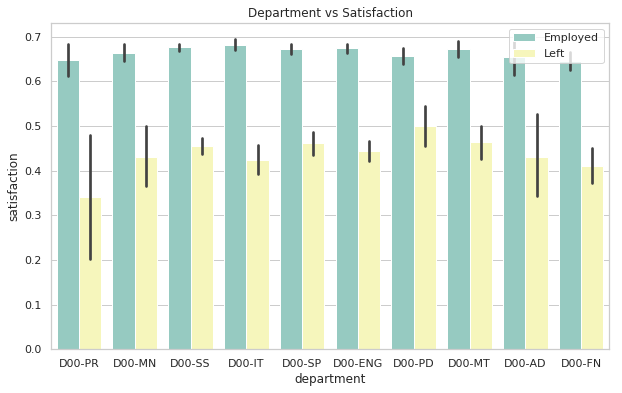

In [90]:
def plot7():
    
    plt.figure(figsize=(10,6))
    sns.barplot(x='department', y='satisfaction', hue= 'status', data=df, palette='Set3')
    plt.legend(loc='upper right')
    plt.title('Department vs Satisfaction')
    plt.show()
plot7()

**Satisfcation level below 0.5 has made employees from all department to quit**



---



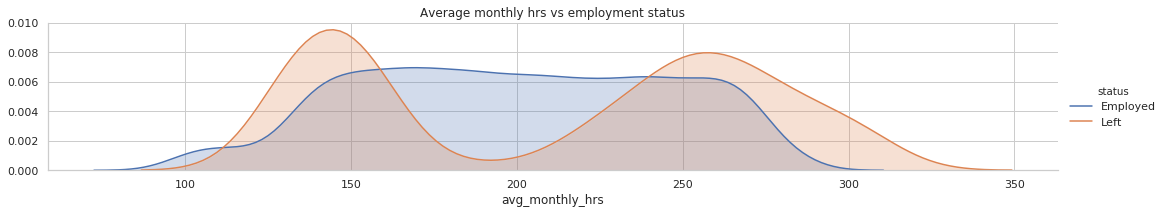

In [53]:
def plot8():
  
  # Plotting monthly hours to check with employment status
  
  as_fig = sns.FacetGrid(df,hue='status',aspect=5)

  as_fig.map(sns.kdeplot,'avg_monthly_hrs',shade=True)

  as_fig.add_legend()
  
  plt.title('Average monthly hrs vs employment status')

plot8()

**Average monthly being too low or too high has increased chance of leaving.**

**Employment status seems to be good for average hours lying between 140 - 270**



---



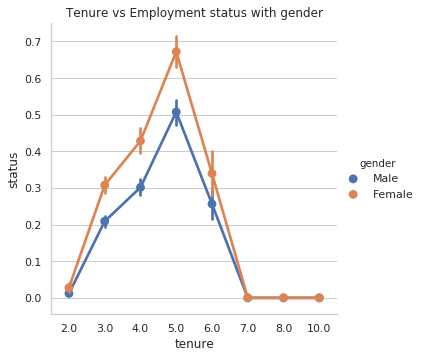

In [85]:
def plot9():
  
  
  temp = df.copy(deep=True)
  num = {"status": {"Left": 1, "Employed": 0}}
  
  temp.replace(num, inplace=True)
  
  sns.catplot('tenure','status', hue= 'gender', kind='point',data=temp)
  plt.title('Tenure vs Employment status with gender')
  
  
plot9()         
   



---



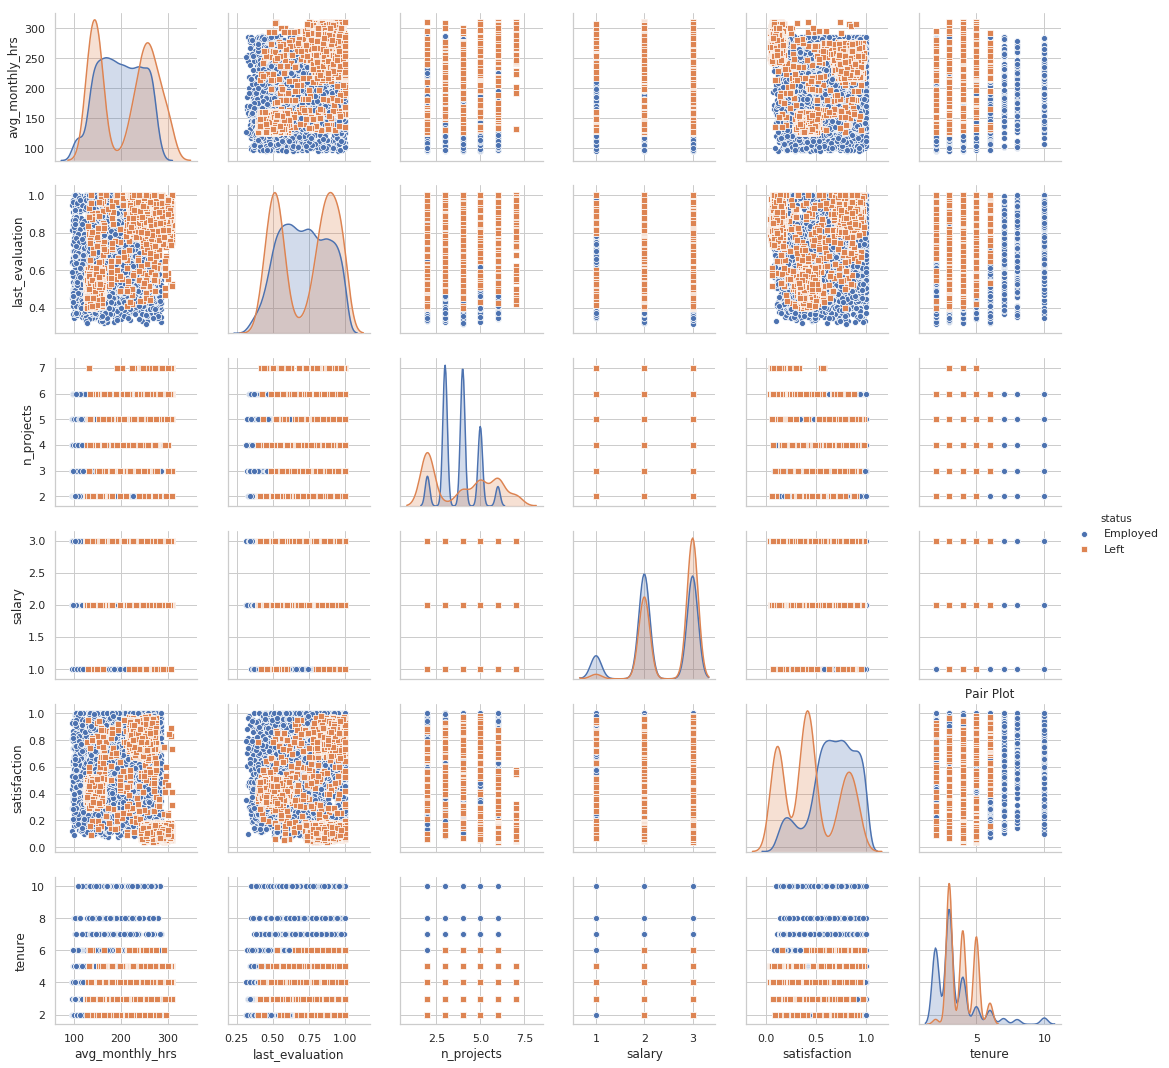

In [98]:
def plot10():
  
  temp = df.copy(deep=True)
  num = {"salary": {"high": 1, "medium": 2, "low": 3}}
  
  temp.replace(num, inplace=True)
  
  sns.pairplot(temp[['avg_monthly_hrs','last_evaluation','n_projects','salary','satisfaction','tenure', 'status']], vars=['avg_monthly_hrs','last_evaluation','n_projects','salary','satisfaction','tenure'],  
               hue="status", dropna=True, markers=["o", "s"])
  plt.title('Pair Plot')
  
plot10()




---



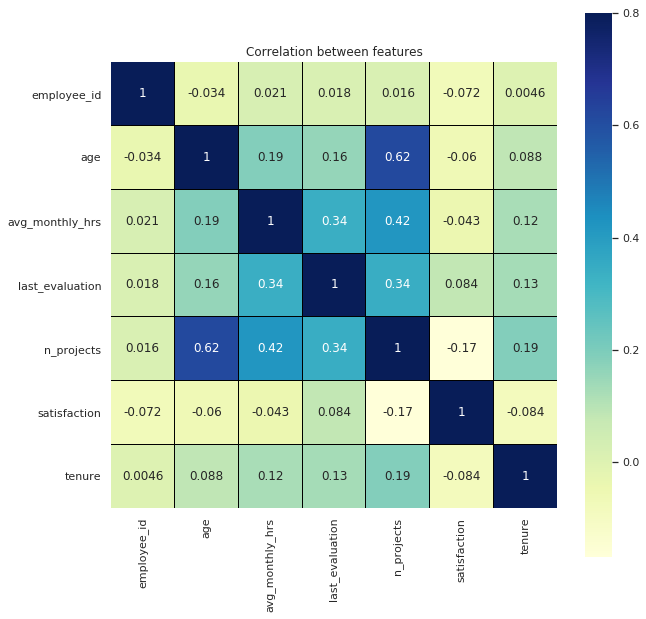

In [100]:
def plot11():
  
  corr = df.corr()
  plt.figure(figsize=(10,10))
  sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
  plt.title('Correlation between features')
  
plot11()

**END of EDA**


---



# Machine Learning - In Progress